# Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`. As always, `pandas` has been imported for you as `pd`.

In [19]:
import pandas as pd

gdp = pd.read_csv("dataset/WorldBank_GDP.csv")
sp500 = pd.read_csv("dataset/S&P500.csv")
pop = pd.read_csv("dataset/WorldBank_POP.csv")

print(gdp.columns)
print(sp500.columns)
print(pop.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'GDP'], dtype='object')
Index(['Date', 'Returns'], dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'Pop'], dtype='object')


In [11]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')

# Print gdp_sp500
print(gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

In [13]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left', fill_method='ffill')

# Print gdp_sp500
print (gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP  Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012   
11  United States          USA  GDP (current US$)  2

In [15]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP' , 'Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


# Phillips curve using merge_ordered()

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you.

In [17]:
# # Use merge_ordered() to merge inflation, unemployment with inner join
# inflation_unemploy = pd.merge_ordered(inflation, unemployment, how = "inner", on='date')

# # Print inflation_unemploy 
# print(inflation_unemploy)

# # Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
# inflation_unemploy.plot(x= 'unemployment_rate', y= 'cpi',kind= 'scatter')
# plt.show()

# merge_ordered() caution, multiple columns

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. *Depending on the order provided, the fill forward will use unintended data to fill in the missing values*.

The tables `gdp` and `pop` have been loaded.

In [22]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp , pop, on=['Year' , 'Country Name'],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

            Country Name Country Code_x   Indicator Name_x  Year  \
0            Afghanistan            NaN                NaN  2010   
1                Albania            NaN                NaN  2010   
2                Algeria            NaN                NaN  2010   
3         American Samoa            NaN                NaN  2010   
4                Andorra            NaN                NaN  2010   
...                  ...            ...                ...   ...   
2643  West Bank and Gaza            USA  GDP (current US$)  2018   
2644               World            USA  GDP (current US$)  2018   
2645         Yemen, Rep.            USA  GDP (current US$)  2018   
2646              Zambia            USA  GDP (current US$)  2018   
2647            Zimbabwe            USA  GDP (current US$)  2018   

               GDP Country Code_y   Indicator Name_y           Pop  
0              NaN            AFG  Population, total  2.918551e+07  
1              NaN            ALB  Population

In [23]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp , pop, on=['Country Name', 'Year'],
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

     Country Name Country Code_x   Indicator Name_x  Year           GDP  \
0     Afghanistan            NaN                NaN  2010           NaN   
1     Afghanistan            NaN                NaN  2011           NaN   
2     Afghanistan            NaN                NaN  2012           NaN   
3     Afghanistan            NaN                NaN  2012           NaN   
4     Afghanistan            NaN                NaN  2013           NaN   
...           ...            ...                ...   ...           ...   
2643     Zimbabwe            USA  GDP (current US$)  2014  2.049410e+13   
2644     Zimbabwe            USA  GDP (current US$)  2015  2.049410e+13   
2645     Zimbabwe            USA  GDP (current US$)  2016  2.049410e+13   
2646     Zimbabwe            USA  GDP (current US$)  2017  2.049410e+13   
2647     Zimbabwe            USA  GDP (current US$)  2018  2.049410e+13   

     Country Code_y   Indicator Name_y         Pop  
0               AFG  Population, total  291855

# Using merge_asof() to study stocks

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

In [24]:
# # Use merge_asof() to merge jpm and wells
# jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=('', '_wells'), direction= "nearest")


# # Use merge_asof() to merge jpm_wells and bac
# jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time", suffixes=('_jpm', '_bac'),direction= "nearest")


# # Compute price diff
# price_diffs = jpm_wells_bac.diff()

# # Plot the price diff of the close of jpm, wells and bac only
# price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
# plt.show()

# Using merge_asof() to create dataset

The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you.

In [25]:
# # Merge gdp and recession on date using merge_asof()
# gdp_recession = pd.merge_asof(gdp,recession, on="date" )

# # Create a list based on the row value of gdp_recession['econ_status']
# is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# # Plot a bar chart of gdp_recession
# gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
# plt.show()

# merge_asof() and merge_ordered() differences

The `merge_asof()` and `merge_ordered()` functions are similar in the type of merge they perform and the input arguments they use. In this exercise, think about how the functions are different.

<center><img src="images/04.03.png"  style="width: 400px, height: 300px;"/></center>


# Explore financials with .query()

You have been given a table of financial data from some popular social network companies called `social_fin`. All of the values are in thousands of US dollars.

Use the `.query()` method and the IPython shell to explore `social_fin` and select the True statement.

In [26]:
# social_fin.query('value < 0 and financial == "net_income"')

# Subsetting rows with .query()

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables `gdp` and `pop` have been loaded for you.

In [28]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method= 'ffill')

print(gdp_pop[:5])

  Country Name Country Code_x Indicator Name_x  Year  GDP Country Code_y  \
0  Afghanistan            NaN              NaN  2010  NaN            AFG   
1  Afghanistan            NaN              NaN  2011  NaN            AFG   
2  Afghanistan            NaN              NaN  2012  NaN            AFG   
3  Afghanistan            NaN              NaN  2012  NaN            AFG   
4  Afghanistan            NaN              NaN  2013  NaN            AFG   

    Indicator Name_y         Pop  
0  Population, total  29185507.0  
1  Population, total  30117413.0  
2  Population, total  31161376.0  
3  Population, total  31161376.0  
4  Population, total  32269589.0  


In [47]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']
gdp_pop = gdp_pop[(gdp_pop["Country Name"]=="Australia") | (gdp_pop["Country Name"]=="Sweden") ]
print(gdp_pop[:5])


    Country Name Country Code_x Indicator Name_x  Year  GDP Country Code_y  \
110    Australia            NaN              NaN  2010  NaN            AUS   
111    Australia            NaN              NaN  2011  NaN            AUS   
112    Australia            NaN              NaN  2012  NaN            AUS   
113    Australia            NaN              NaN  2012  NaN            AUS   
114    Australia            NaN              NaN  2013  NaN            AUS   

      Indicator Name_y         Pop  gdp_per_capita  
110  Population, total  22031750.0             NaN  
111  Population, total  22340024.0             NaN  
112  Population, total  22733465.0             NaN  
113  Population, total  22733465.0             NaN  
114  Population, total  23128129.0             NaN  


In [48]:
import matplotlib.pyplot as plt
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='Year', columns='Country Name')

gdp_pivot[:5]

Country Name,Sweden
Year,
2010,530054.725219
2011,526067.091513
2012,522189.799455
2013,517783.724997
2014,512671.576539


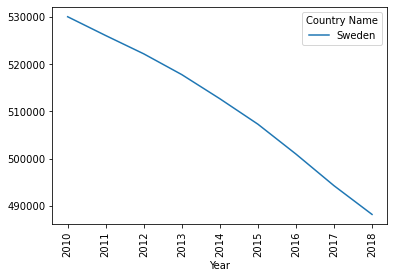

In [52]:
# Select dates equal to or greater than 1991-01-01
# recent_gdp_pop = gdp_pivot.query('Year >=  "1991"')
recent_gdp_pop = gdp_pivot.loc[1991:,]

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

In [53]:
# # Merge gdp and pop on date and country with fill
# gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# # Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
# gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# # Pivot data so gdp_per_capita, where index is date and columns is country
# gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# # Select dates equal to or greater than 1991-01-01
# recent_gdp_pop = gdp_pivot.query('date >=  "1991-01-01"')

# # Plot recent_gdp_pop
# recent_gdp_pop.plot(rot=90)
# plt.show()

# Select the right .melt() arguments

You are given a table named `inflation`. 
The dataframe is :
```
  country    indicator  2017  2018  2019
0  Brazil  Inflation %  3.45  3.66  3.73
1  Canada  Inflation %  1.60  2.27  1.95
2  France  Inflation %  1.03  1.85  1.11
3   India  Inflation %  2.49  4.86  7.66
```

Chose the option to get the same output as the table below.
```
   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66
```


In [54]:
# inflation.melt(id_vars=['country','indicator'],var_name = 'year', value_name = 'annual')

# Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the IPython shell before beginning the exercise.

In [55]:
# # unpivot everything besides the year column
# ur_tall =  ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# # Create a date column using the month and year columns of ur_tall
# ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# # Sort ur_tall by date in ascending order
# ur_sorted = ur_tall.sort_values('date')

# # Plot the unempl_rate by date
# ur_sorted.plot(x='date', y='unempl_rate')
# plt.show()

# Using .melt() for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you.

In [56]:
# # Use melt on ten_yr, unpivot everything besides the metric column
# bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# # Use query on bond_perc to select only the rows where metric=close
# bond_perc_close = bond_perc.query('metric ==  "close"')

# # Merge (ordered) dji and bond_perc_close on date with an inner join
# dow_bond = pd.merge_ordered(dji, bond_perc_close, on="date", how="inner", suffixes= ('_dow', '_bond'))


# # Plot only the close_dow and close_bond columns
# dow_bond.plot(y=['close_dow' , 'close_bond'], x='date', rot=90)
# plt.show()